# Demos: Lecture 8

## Demo 1: Grover revisited

<img src="fig/grover_full.png" width="500px">

In [3]:
import pennylane as qml
import numpy as np

/opt/conda/envs/pennylane/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [6]:
n_bits = 4
dev = qml.device('default.qubit', wires=5)

special_string = '1001'

def hadamard_transform(wires=None):
    for wire in wires:
        qml.Hadamard(wires=wire)
        
        
def oracle():
    qml.MultiControlledX(control_wires=range(n_bits), wires=n_bits, control_values=special_string)    
    
    
def diffusion():
    hadamard_transform(wires=range(n_bits))
    qml.MultiControlledX(control_wires=range(n_bits), wires=n_bits, control_values='0'*n_bits)
    hadamard_transform(wires=range(n_bits))


@qml.qnode(dev)
def grover(num_steps=1):
    qml.PauliX(wires=n_bits)
    
    hadamard_transform(wires=dev.wires)
    
    for _ in range(num_steps):
        oracle()
        diffusion()
        
    return qml.probs(wires=range(n_bits))

In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 16 artists>

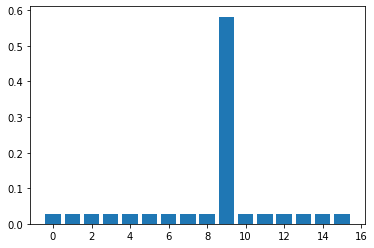

In [11]:
plt.bar(range(2 ** n_bits), grover(num_steps=4))

In [14]:
(np.pi/4) * np.sqrt(2 ** n_bits)

3.141592653589793

## Demo 2: `qml.specs`

In [15]:
n_bits = 3
n_aux_wires = 2

dev = qml.device('default.qubit', wires=n_bits+1+n_aux_wires)

In [29]:
special_string = '101'

def oracle():
    qml.MultiControlledX(control_wires=range(n_bits), wires=n_bits, control_values=special_string)    
    
    
def diffusion():
    hadamard_transform(wires=range(n_bits))
    qml.MultiControlledX(control_wires=range(n_bits), wires=n_bits, control_values='0'*n_bits)
    hadamard_transform(wires=range(n_bits))


@qml.qnode(dev)
def grover(num_steps=1):
    qml.PauliX(wires=n_bits)
    
    hadamard_transform(wires=range(n_bits+1))
    
    for _ in range(num_steps):
        oracle()
        diffusion()
        
    return qml.probs(wires=range(n_bits))

In [30]:
print(qml.draw(grover)(num_steps=2))

 0: ──H─────╭C──H──╭C──H──╭C──H──╭C──H──╭┤ Probs 
 1: ──H─────├C──H──├C──H──├C──H──├C──H──├┤ Probs 
 2: ──H─────├C──H──├C──H──├C──H──├C──H──╰┤ Probs 
 3: ──X──H──╰X─────╰X─────╰X─────╰X──────┤       



In [21]:
from pprint import pprint 

In [22]:
pprint(qml.specs(grover)(num_steps=2))

{'depth': 10,
 'device_name': 'default.qubit.autograd',
 'diff_method': 'best',
 'expansion_strategy': 'gradient',
 'gate_sizes': defaultdict(<class 'int'>, {1: 19, 4: 4}),
 'gate_types': defaultdict(<class 'int'>,
                           {'Hadamard': 18,
                            'MultiControlledX': 4,
                            'PauliX': 1}),
 'gradient_fn': 'backprop',
 'gradient_options': {},
 'interface': 'autograd',
 'num_device_wires': 6,
 'num_diagonalizing_gates': 0,
 'num_observables': 1,
 'num_operations': 23,
 'num_trainable_params': 0,
 'num_used_wires': 6}


In [24]:
dev.operations.remove('MultiControlledX')

In [31]:
special_string = '101'

def oracle():
    qml.MultiControlledX(
        control_wires=range(n_bits), 
        wires=n_bits, 
        control_values=special_string,
        work_wires=[4, 5]
    )    
    
    
def diffusion():
    hadamard_transform(wires=range(n_bits))
    qml.MultiControlledX(
        control_wires=range(n_bits), 
        wires=n_bits, 
        control_values='0'*n_bits,
        work_wires=[4, 5]
    )
    hadamard_transform(wires=range(n_bits))


@qml.qnode(dev)
def grover(num_steps=1):
    qml.PauliX(wires=n_bits)
    
    hadamard_transform(wires=range(n_bits+1))
    
    for _ in range(num_steps):
        oracle()
        diffusion()
        
    return qml.probs(wires=range(n_bits))

In [33]:
print(qml.draw(grover, expansion_strategy='device')(num_steps=2))

 0: ──H─────────╭C─────────╭C──H───X─────╭C─────────╭C──X───H─────╭C─────────╭C──H───X─────╭C─────────╭C──X──H──╭┤ Probs 
 1: ──H──X──────├C─────────├C──X───H──X──├C─────────├C──X───H──X──├C─────────├C──X───H──X──├C─────────├C──X──H──├┤ Probs 
 2: ──H─────╭C──│───╭C──H──│───X──╭C─────│───╭C──X──│───H──╭C─────│───╭C──H──│───X──╭C─────│───╭C──X──│───H─────╰┤ Probs 
 3: ──X──H──├X──│───├X─────│──────├X─────│───├X─────│──────├X─────│───├X─────│──────├X─────│───├X─────│──────────┤       
 4: ────────╰C──╰X──╰C─────╰X─────╰C─────╰X──╰C─────╰X─────╰C─────╰X──╰C─────╰X─────╰C─────╰X──╰C─────╰X─────────┤       



In [34]:
dev.operations.remove('Toffoli')

In [36]:
print(qml.draw(grover, expansion_strategy='device')(num_steps=1))

 0: ──H────────────────────────────────────────────────────────────────────╭C──────────────╭C──╭C──T────╭C─────────────────────────────────────────────────────────────╭C──────────────╭C──╭C──T────╭C──H─────X─────────────────────────────────────────────────╭C──────────────╭C──╭C──T────╭C──────────────────────────────────────────────────────────╭C──────────────╭C──╭C──T────╭C──X──H──╭┤ Probs 
 1: ──H──X────────────────────────────────────────────────────────╭C───────│──────╭C──T────│───╰X──T⁻¹──╰X────────────────────────────────────────────────────╭C───────│──────╭C──T────│───╰X──T⁻¹──╰X──X─────H──X─────────────────────────────────────╭C───────│──────╭C──T────│───╰X──T⁻¹──╰X─────────────────────────────────────────────────╭C───────│──────╭C──T────│───╰X──T⁻¹──╰X──X──H──├┤ Probs 
 2: ──H─────────────────╭C──────────────╭C─────╭C──T───────╭C─────│────────│──────│────────│─────────────────────╭C──────────────╭C─────╭C──T───────╭C──H──X──│────────│──────│────────│─────────────────────╭C─────

In [37]:
print(qml.specs(grover, max_expansion=8)(num_steps=1))

{'gate_sizes': defaultdict(<class 'int'>, {1: 11, 4: 2}), 'gate_types': defaultdict(<class 'int'>, {'PauliX': 1, 'Hadamard': 10, 'MultiControlledX': 2}), 'num_operations': 13, 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_used_wires': 4, 'depth': 6, 'num_trainable_params': 0, 'num_device_wires': 6, 'device_name': 'default.qubit.autograd', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'autograd', 'diff_method': 'best', 'gradient_fn': 'backprop'}


In [42]:
grover(num_steps=2)

tensor([0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.9453125,
        0.0078125, 0.0078125], requires_grad=True)

In [43]:
g = qml.CircuitGraph(grover.qtape.operations, grover.qtape.measurements, wires=dev.wires)

In [45]:
grover.qtape.operations

[PauliX(wires=[3]),
 Hadamard(wires=[0]),
 Hadamard(wires=[1]),
 Hadamard(wires=[2]),
 Hadamard(wires=[3]),
 MultiControlledX(wires=[0, 1, 2, 3]),
 Hadamard(wires=[0]),
 Hadamard(wires=[1]),
 Hadamard(wires=[2]),
 MultiControlledX(wires=[0, 1, 2, 3]),
 Hadamard(wires=[0]),
 Hadamard(wires=[1]),
 Hadamard(wires=[2]),
 MultiControlledX(wires=[0, 1, 2, 3]),
 Hadamard(wires=[0]),
 Hadamard(wires=[1]),
 Hadamard(wires=[2]),
 MultiControlledX(wires=[0, 1, 2, 3]),
 Hadamard(wires=[0]),
 Hadamard(wires=[1]),
 Hadamard(wires=[2])]

In [44]:
g.get_depth()

10